In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

depto_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Depto.csv', index_col=0)
escuela_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Escuela.csv', index_col=0)
provincia_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Provincia.csv', index_col=0)

In [ ]:
import numpy as np

df = pd.merge(escuela_df.copy(), depto_df.copy(), how='left', left_on = 'departamento_id', right_on='id', suffixes=('', '_DROP'))
df = df.drop(['provincia_id_DROP', 'id_DROP'], axis=1)
df.rename(columns={'id': 'escuela_id', 'name': 'depto_name', 'departamento_id': 'depto_id' }, inplace=True)
df.replace('nc', np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)

**nan = -1,
Yes aid = 1,
No aid = 2**

In [ ]:
%%capture
df.subvencion[df.subvencion.isnull()] = -1
df.subvencion[df.subvencion == 'Sin información'] = -1
df.subvencion[df.subvencion == 'Subvención Total'] = 1
df.subvencion[df.subvencion == 'Más de 75% y hasta 99%'] = 1
df.subvencion[df.subvencion == 'Más de 50% y hasta 75%'] = 1
df.subvencion[df.subvencion == 'Más de 25% y hasta 50%'] = 1
df.subvencion[df.subvencion == 'Hasta 25%'] = 1
df.subvencion[df.subvencion == 'Parcial'] = 1
df.subvencion[df.subvencion == 'No'] = 2
df.subvencion[df.subvencion == 'No corresponde'] = 2

In [ ]:
%%capture
df.gestion[df.gestion == 'estatal'] = 0
df.gestion[df.gestion == 'privada'] = 1
df.gestion[df.gestion == 'social/cooperativa'] = 2

In [ ]:
df[df.gestion == 2].isnull().sum()

escuela_id                           0
ambito                               0
gestion                              0
icse                               307
icse_cat                           307
indice_socioeconomico_medio        295
indice_socioeconomico_medio_cat    295
tecnica                              0
tiene_internet                     276
subvencion                           0
dependencia                        201
depto_id                           186
provincia_id                         0
depto_name                         186
tasa_con_nbi                       220
dtype: int64

**Remove 'social/cooperativa' schools given that they are few and the majority lack a lot of data.**

In [ ]:
df = df[df.gestion != 2] 

In [ ]:
df.isnull().sum(axis = 0)


escuela_id                             0
ambito                                 0
gestion                                0
icse                               37852
icse_cat                           37852
indice_socioeconomico_medio        37209
indice_socioeconomico_medio_cat    37209
tecnica                                0
tiene_internet                     28717
subvencion                             0
dependencia                        19601
depto_id                           16760
provincia_id                           0
depto_name                         16760
tasa_con_nbi                       31640
dtype: int64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.linspace(0, 10, num=11)
f1 = lambda x: len(df[df.isnull().sum(axis = 1) == x])

f1 = np.vectorize(f)
y1 = f1(x.copy())

x2 = np.linspace(0, 10, num=11)
f2 = lambda x: f1(x)/len(df)
f2 = np.vectorize(f2)
y2 = f2(x2.copy())

x3 = np.linspace(0, len(df.columns)-1, num=len(df.columns))
f3 = lambda x: len(df[df.isnull().sum(axis = 1) <= x])/len(df)
f3 = np.vectorize(f3)
y3 = f3(x3.copy())




Text(0.5, 0, '# NaN in Row')

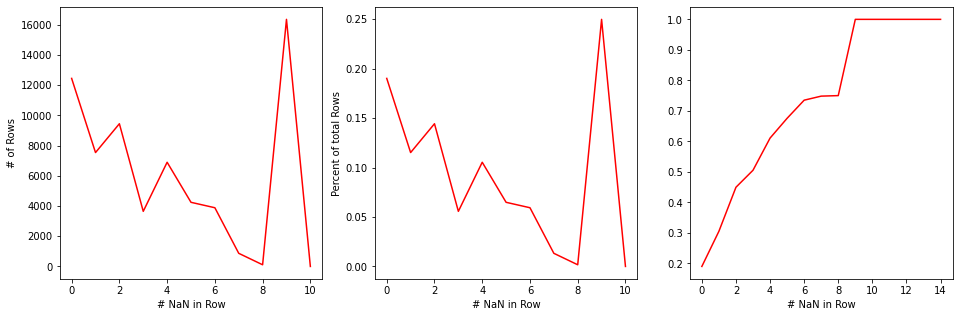

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16, 5))

ax1.plot(x1,y1 ,color='red')
ax1.set_xlabel('# NaN in Row')
ax1.set_ylabel('# of Rows')

ax2.plot(x2,y2 ,color='red')
ax2.set_xlabel('# NaN in Row')
ax2.set_ylabel('Percent of total Rows')

ax3.plot(x3, y3, color='red')
ax3.set_xlabel('# NaN in Row')

In [ ]:
df[df.isnull().sum(axis = 1) == 8]

,escuela_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,depto_id,provincia_id,depto_name,tasa_con_nbi
238,1366327622,urbano,1,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,0,NaN,NaN
353,9862636245,rural,0,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,8,NaN,NaN
377,23782082316,rural,0,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,20,NaN,NaN
631,1059125517,urbano,1,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,0,NaN,NaN
689,10882864416,rural,0,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31336,12542287619,urbano,0,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,16,NaN,NaN
31582,12602907030,urbano,1,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,10,NaN,NaN
31626,1472659224,urbano,1,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,0,NaN,NaN
31766,2860547339,urbano,0,NaN,NaN,NaN,NaN,f,NaN,2,provincial,NaN,2,NaN,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['indice_socioeconomico_medio'] = scaler.fit_transform(df['indice_socioeconomico_medio'].values.reshape(-1, 1))

In [ ]:
df

,escuela_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,depto_id,provincia_id,depto_name,tasa_con_nbi
0,11341915221,urbano,0,0.656,critico,0.550437,tercil_bajo,f,f,2,provincial,178.0,13,sin información,-1.000000
1,2317536438,urbano,1,-1.000,NaN,1.345814,tercil_alto,f,t,1,provincial,44.0,0,Tres de Febrero,0.043317
2,1143119819,urbano,0,0.101,bajo_y_medio,1.135273,tercil_medio,f,f,2,provincial,1.0,0,avellaneda,0.057998
3,8740979823,urbano,0,0.452,alto,1.008135,tercil_bajo,f,t,2,provincial,136.0,9,Ledesma,0.170017
4,12420777423,rural,0,0.666,critico,0.550437,tercil_bajo,f,t,2,provincial,168.0,13,Cainguás,0.151387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65727,10004962020,urbano,0,-1.000,NaN,-0.853168,NaN,f,f,1,municipal,159.0,12,Las Heras,0.077735
65728,7804646226,urbano,1,-1.000,NaN,-0.853168,NaN,f,t,1,provincial,122.0,7,Nogoyá,0.060949
65729,8502645125,urbano,0,-1.000,NaN,-0.853168,NaN,f,NaN,2,provincial,132.0,8,Pirané,0.194959
65730,14043712878,urbano,0,-1.000,NaN,-0.853168,NaN,f,NaN,2,provincial,176.0,13,Oberá,0.145722
